In [1]:
# Step 1: Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# Step 2: 📚 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Step 3:📁 Load Dataset
df = pd.read_csv('/content/drive/MyDrive/data_ndv/salary_data.csv')
print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [45]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [46]:
#Step 4: 🔍 EDA & Statistical Summary
print("✅ Dataset Preview")
print(df.head())

print("\nℹ️ Info:")
print(df.info())

print("\n📊 Summary statistics:")
print(df.describe(include='all'))

✅ Dataset Preview
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

ℹ️ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None

📊 Summary statistics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


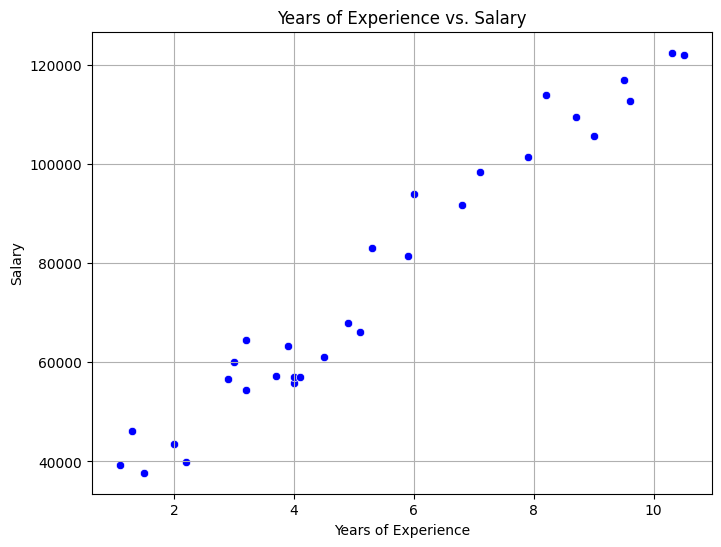

In [47]:
# Step 5: Visualize the Dataset
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue')
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [48]:
# Step 6:🧹 Handle Missing Values (if any)
print("\n🔎 Missing values per column:\n", df.isnull().sum())
df.dropna(inplace=True)


🔎 Missing values per column:
 YearsExperience    0
Salary             0
dtype: int64


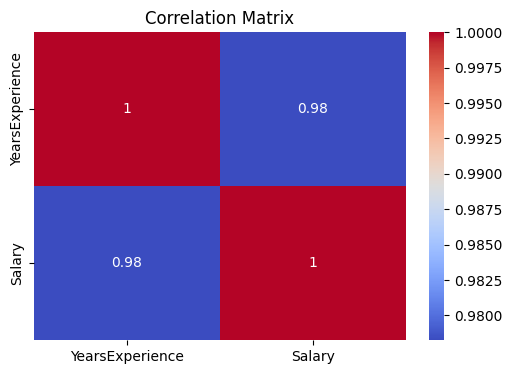

In [49]:
# Step 7:📈 Correlation Heatmap
numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

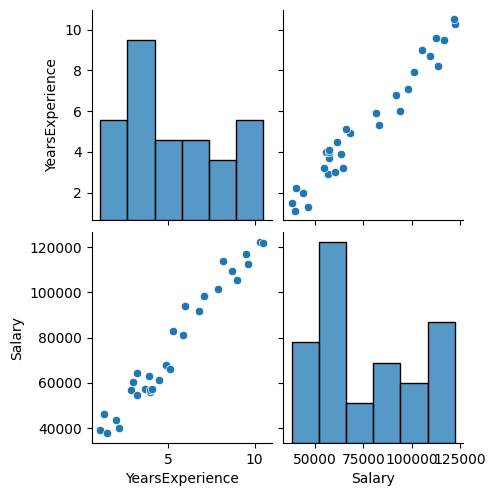

In [50]:
# Step 8:📊 Pairplot to View Relationships
sns.pairplot(numeric)
plt.show()

In [51]:
# Step 9:🎯 Prepare Data
X = df[['YearsExperience']]
y = df['Salary']

In [52]:
# Step 10:🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [53]:
# Step 11:🤖 Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Step 12:🧮 Predictions & Evaluation
y_pred = model.predict(X_test)
print("\n📌 Model Performance")
print("Intercept:", round(model.intercept_, 2))
print("Coefficient:", round(model.coef_[0], 2))
print("R² Score:", round(r2_score(y_test, y_pred), 4))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))


📌 Model Performance
Intercept: 25321.58
Coefficient: 9423.82
R² Score: 0.9024
MSE: 49830096.86


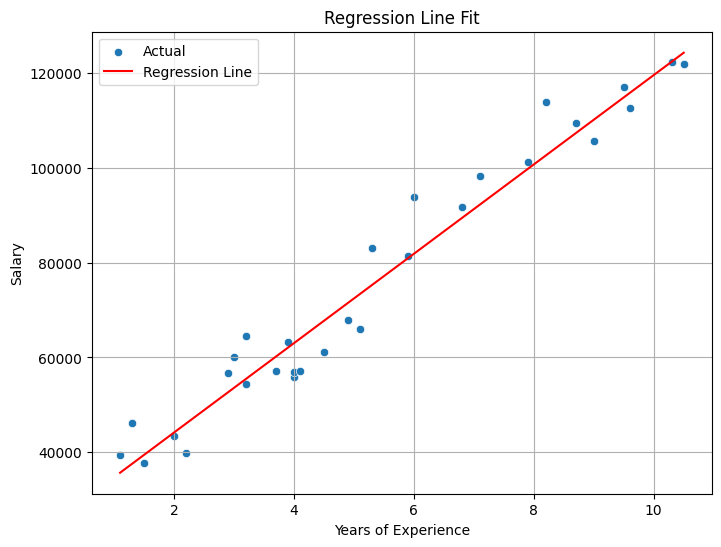

In [55]:
# Step 13: Plot Regression Line
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Actual')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Regression Line Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

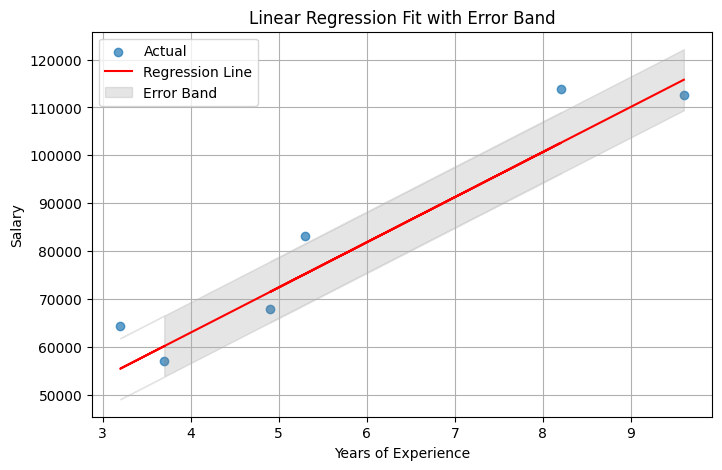

In [56]:
# Step 14:📉 Plot Regression Line with Error Bands
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label='Actual', alpha=0.7)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.fill_between(
    X_test.squeeze(),
    y_pred - np.std(y_test - y_pred),
    y_pred + np.std(y_test - y_pred),
    color='gray',
    alpha=0.2,
    label='Error Band'
)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Fit with Error Band')
plt.legend()
plt.grid(True)
plt.show()

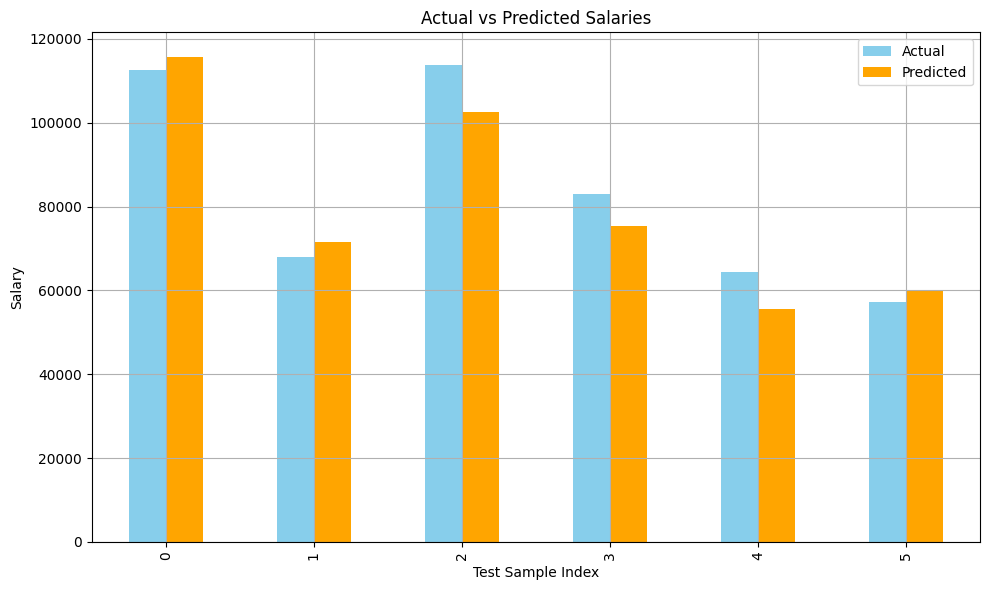

In [57]:
# Step 15:📊 Compare Predictions with Actual using Bar Plot
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_df.reset_index(drop=True, inplace=True)
comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Test Sample Index')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# Step 16:🔮 User Input for Custom Prediction
def predict_salary():
    try:
        years = float(input("🔍 Enter years of experience: "))
        prediction = model.predict([[years]])
        print(f"💰 Predicted Salary for {years} years of experience: ${prediction[0]:,.2f}")
    except:
        print("❌ Invalid input. Please enter a valid number.")